In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Import All Libraries
import os
import scipy.io
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path="/content/drive/MyDrive/dataset em wise/nem=3"
dir_list1 = os.listdir(path)
nEvals=100
nSampC1=len(dir_list1)
xC1=np.zeros([nSampC1,nEvals])
for i in range(nSampC1):
  v1 = scipy.io.loadmat(path + '/' + dir_list1[i])
  v=v1['LambdaVal']
  v=np.squeeze(v[0:nEvals])
  xC1[i,:]=v

np.shape(xC1)

(319, 100)

In [ ]:
path="/content/drive/MyDrive/dataset em wise/nem=4"
dir_list2 = os.listdir(path)
nSampC2=len(dir_list2)
xC2=np.zeros([nSampC2,nEvals])
for i in range(nSampC2):
  v1 = scipy.io.loadmat(path + '/' + dir_list2[i])
  v=v1['LambdaVal']
  v=np.squeeze(v[0:nEvals])
  xC2[i,:]=v

np.shape(xC2)

(882, 100)

In [ ]:
path="/content/drive/MyDrive/dataset em wise/nem=5"
dir_list3 = os.listdir(path)
nSampC3=len(dir_list3)
xC3=np.zeros([nSampC3,nEvals])
for i in range(nSampC3):
  v1 = scipy.io.loadmat(path + '/' + dir_list3[i])
  v=v1['LambdaVal']
  v=np.squeeze(v[0:nEvals])
  xC3[i,:]=v

np.shape(xC3)

(527, 100)

In [ ]:
path="/content/drive/MyDrive/dataset em wise/nem=6"
dir_list4 = os.listdir(path)
nSampC4=len(dir_list4)
xC4=np.zeros([nSampC4,nEvals])
for i in range(nSampC4):
  v1 = scipy.io.loadmat(path + '/' + dir_list4[i])
  v=v1['LambdaVal']
  v=np.squeeze(v[0:nEvals])
  xC4[i,:]=v

np.shape(xC4)

(367, 100)

In [ ]:
path="/content/drive/MyDrive/dataset em wise/nem=8"
dir_list5 = os.listdir(path)
nSampC5=len(dir_list5)
xC5=np.zeros([nSampC5,nEvals])
for i in range(nSampC5):
  v1 = scipy.io.loadmat(path + '/' + dir_list5[i])
  v=v1['LambdaVal']
  v=np.squeeze(v[0:nEvals])
  xC5[i,:]=v

np.shape(xC5)

(96, 100)

In [ ]:
path="/content/drive/MyDrive/dataset em wise/nem=9"
dir_list6 = os.listdir(path)
nSampC6=len(dir_list6)
xC6=np.zeros([nSampC6,nEvals])
for i in range(nSampC6):
  v1 = scipy.io.loadmat(path + '/' + dir_list6[i])
  v=v1['LambdaVal']
  v=np.squeeze(v[0:nEvals])
  xC6[i,:]=v

np.shape(xC6)

(539, 100)

In [ ]:
x=np.concatenate((xC1,xC2,xC3,xC4,xC5,xC6),axis=0)
#x=np.concatenate((xC1,xC2),axis=0)
np.shape(x)
y1=np.zeros(nSampC1)
y2=np.ones(nSampC2)
y3=2*np.ones(nSampC3)
y4=3*np.ones(nSampC4)
y5=4*np.ones(nSampC5)
y6=5*np.ones(nSampC6)
y=np.concatenate((y1,y2,y3,y4,y5,y6))
#atenate((y1,y2))


In [ ]:
np.save('Eval.npy',x)
np.save('Class.npy',y)

In [ ]:
# Save Image
np.save('/content/drive/MyDrive/Eval.npy',x)
np.save('/content/drive/MyDrive/Class.npy',y)

In [ ]:
x=np.load('Eval.npy')
y=np.load('Class.npy')

In [ ]:
x.shape

(2730, 100)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
x=normalize(x, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
np.shape(X_train)

(1829, 100)

In [ ]:
print('size of X_train:', X_train.shape)
print('size of X_test:',  X_test.shape)
print('size of y_train:', y_train.shape)
print('size of y_test:', y_test.shape)

size of X_train: (1829, 100)
size of X_test: (901, 100)
size of y_train: (1829,)
size of y_test: (901,)


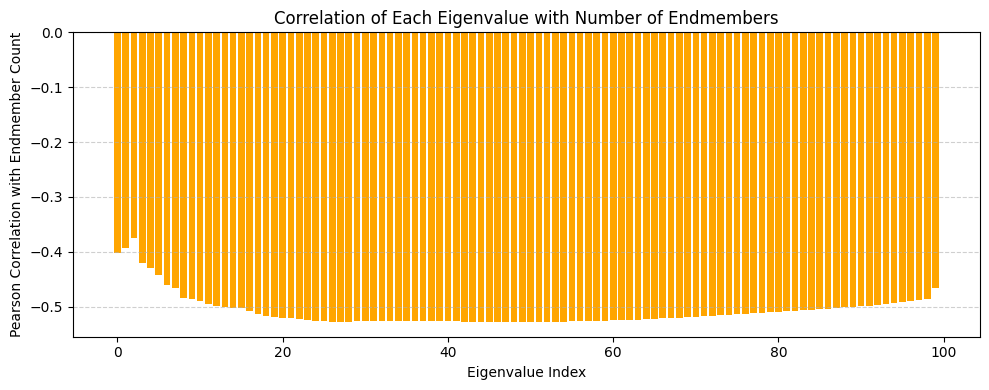


Top 5 eigenvalue indices most correlated with number of endmembers:
    Eigen_Index  Pearson_r  Spearman_rho
48           48  -0.528541     -0.621116
49           49  -0.528408     -0.621174
50           50  -0.528335     -0.621136
51           51  -0.528262     -0.621352
47           47  -0.528248     -0.621082


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load data
x = np.load('Eval.npy')   # shape: (2730, 100)
y = np.load('Class.npy')  # shape: (2730,)

# Step 2: Convert y (classes) to 1-based number of endmembers
y_endmember = y + 1  # Now ranges from 1 to 6

# Step 3: Calculate correlation (Pearson and Spearman) for each eigenvalue column
pearson_r = []
spearman_rho = []

for i in range(x.shape[1]):
    r, _ = stats.pearsonr(x[:, i], y_endmember)
    rho, _ = stats.spearmanr(x[:, i], y_endmember)
    pearson_r.append(r)
    spearman_rho.append(rho)

# Step 4: Create a DataFrame with correlation values
corr_df = pd.DataFrame({
    'Eigen_Index': np.arange(x.shape[1]),
    'Pearson_r': pearson_r,
    'Spearman_rho': spearman_rho
})

# Step 5: Plot Pearson correlation vs eigenvalue index
plt.figure(figsize=(10, 4))
plt.bar(corr_df['Eigen_Index'], corr_df['Pearson_r'], color='orange')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Pearson Correlation with Endmember Count')
plt.title('Correlation of Each Eigenvalue with Number of Endmembers')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 6: Optional – print top 5 most correlated eigenvalues
top_indices = corr_df['Pearson_r'].abs().argsort()[::-1][:5]
print("\nTop 5 eigenvalue indices most correlated with number of endmembers:")
print(corr_df.loc[top_indices])


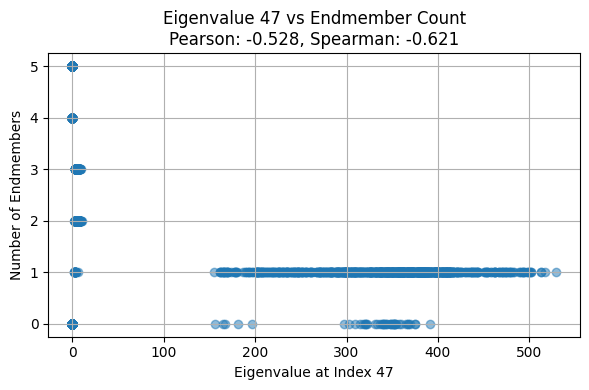

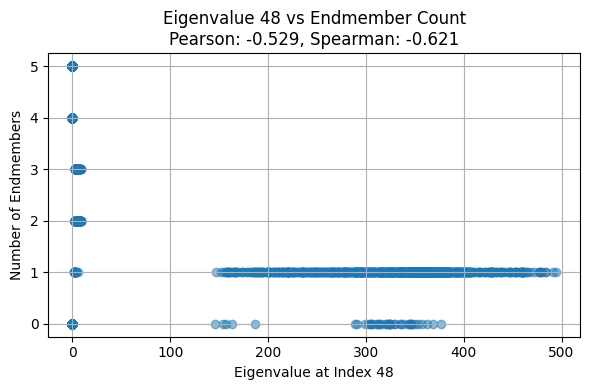

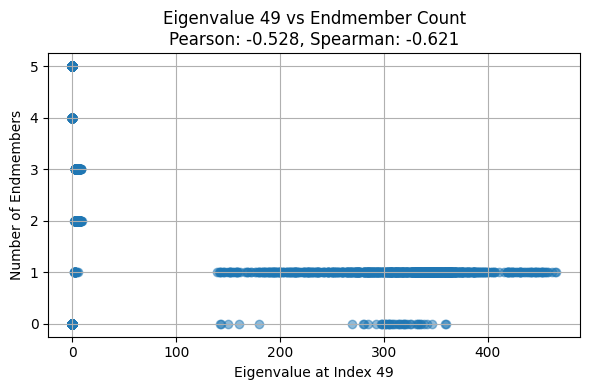

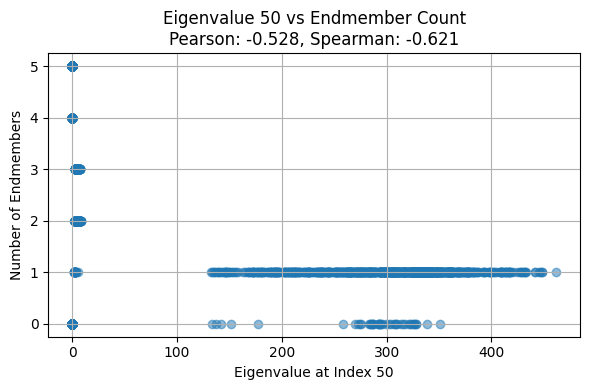

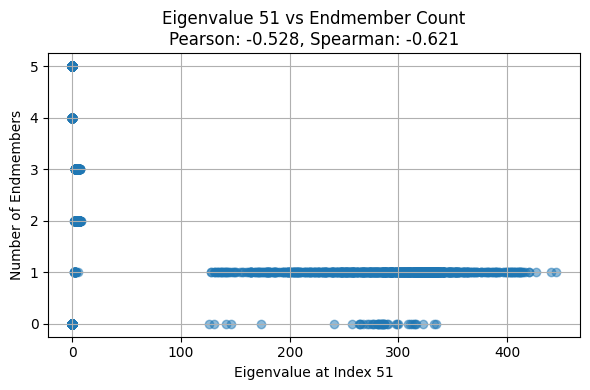

In [ ]:
import matplotlib.pyplot as plt

indices = [47, 48, 49, 50, 51]

for idx in indices:
    plt.figure(figsize=(6, 4))
    plt.scatter(x[:, idx], y, alpha=0.5)
    plt.xlabel(f'Eigenvalue at Index {idx}')
    plt.ylabel('Number of Endmembers')
    plt.title(f'Eigenvalue {idx} vs Endmember Count\nPearson: {pearson_r[idx]:.3f}, Spearman: {spearman_rho[idx]:.3f}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Correlation between PCA components (distribution pattern) and number of classes:

PCA-1: Pearson r = -0.0880, Spearman ρ = 0.1054
PCA-2: Pearson r = -0.0252, Spearman ρ = 0.2130
PCA-3: Pearson r = 0.1565, Spearman ρ = 0.2653
PCA-4: Pearson r = -0.0543, Spearman ρ = 0.0005
PCA-5: Pearson r = 0.3881, Spearman ρ = 0.4200


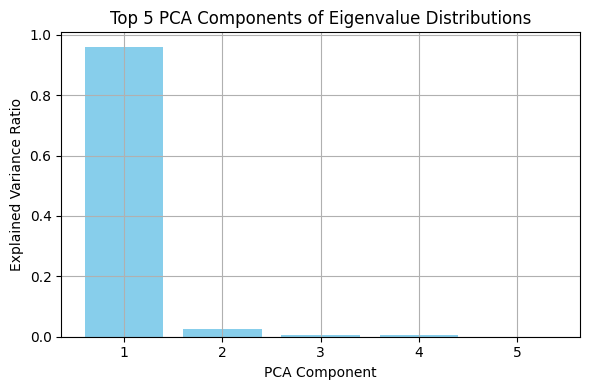

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt

# Load data
x = np.load('Eval.npy')   # Shape: (2730, 100)
y = np.load('Class.npy')  # Shape: (2730,)

# Step 1: Normalize eigenvalue distributions (optional but recommended)
x_norm = (x - x.mean(axis=1, keepdims=True)) / (x.std(axis=1, keepdims=True) + 1e-8)

# Step 2: Apply PCA to extract distribution pattern components
pca = PCA(n_components=5)  # Keep top 5 components
x_pca = pca.fit_transform(x_norm)  # Shape: (2730, 5)

# Step 3: Compute correlation of each PCA component with number of classes
print("Correlation between PCA components (distribution pattern) and number of classes:\n")
for i in range(x_pca.shape[1]):
    pearson_corr, _ = pearsonr(x_pca[:, i], y)
    spearman_corr, _ = spearmanr(x_pca[:, i], y)
    print(f"PCA-{i+1}: Pearson r = {pearson_corr:.4f}, Spearman ρ = {spearman_corr:.4f}")

# Step 4 (Optional): Plot the explained variance to interpret PCA
plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), pca.explained_variance_ratio_[:5], color='skyblue')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Top 5 PCA Components of Eigenvalue Distributions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

# Load your data
x = np.load('Eval.npy')
y = np.load('Class.npy')

# Use top 5 most correlated eigenvalue indices
top_indices = [48, 49, 50, 51, 47]
X_top = x[:, top_indices]

# Fit linear regression model
model = LinearRegression()
model.fit(X_top, y)
y_pred = model.predict(X_top)

# Compute R² score (coefficient of determination)
r2 = r2_score(y, y_pred)
print(f"Combined Linear R²: {r2:.4f}")

# Compute Spearman correlation between prediction and actual classes
spearman_corr, _ = spearmanr(y_pred, y)
print(f"Combined Spearman Correlation: {spearman_corr:.4f}")


Combined Linear R²: 0.2794
Combined Spearman Correlation: 0.6225


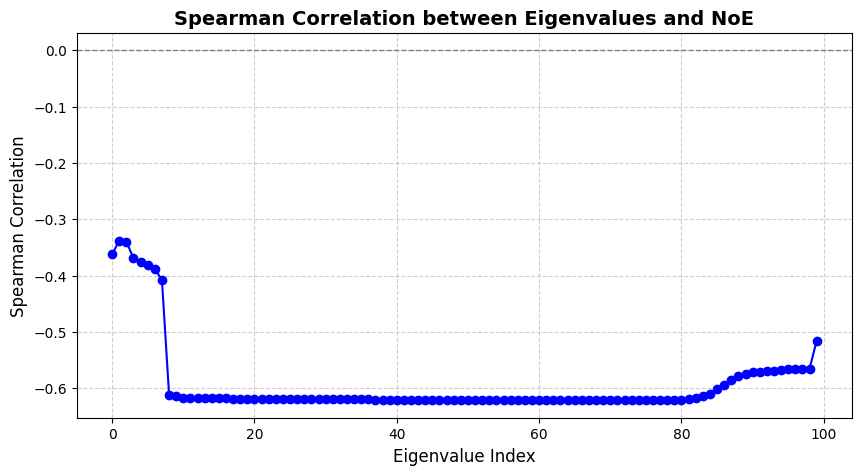

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load data
x = np.load('Eval.npy')  # Eigenvalues
y = np.load('Class.npy') # NoE

# Compute Spearman correlation for each eigenvalue index
spearman_corrs = [spearmanr(x[:, i], y)[0] for i in range(x.shape[1])]

# Plot correlation vs eigenvalue index
plt.figure(figsize=(10, 5))
plt.plot(range(x.shape[1]), spearman_corrs, marker='o', color='b', linewidth=1.5)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Spearman Correlation between Eigenvalues and NoE", fontsize=14, fontweight='bold')
plt.xlabel("Eigenvalue Index", fontsize=12)
plt.ylabel("Spearman Correlation", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load data
x = np.load('Eval.npy')  # Eigenvalues
y = np.load('Class.npy') # NoE

# Spearman correlation for each eigenvalue index
spearman_corrs = [spearmanr(x[:, i], y)[0] for i in range(x.shape[1])]

# IEEE-style plot
plt.figure(figsize=(3.5, 2.5), dpi=300)  # Small size for IEEE column width
plt.plot(range(x.shape[1]), spearman_corrs, marker='o', markersize=3,
         color='black', linewidth=0.8)

# Axis labels
plt.xlabel("Eigenvalue Index", fontsize=8, fontweight='bold')
plt.ylabel("Spearman Correlation", fontsize=8, fontweight='bold')

# Title (optional — IEEE figures usually have caption instead)
# plt.title("Spearman Correlation between Eigenvalues and NoE", fontsize=9, fontweight='bold')

# Grid for better readability
plt.grid(True, linestyle='--', linewidth=0.4, alpha=0.6)

# Ticks
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Tight layout for minimal whitespace
plt.tight_layout()

# Save in high resolution for IEEE
plt.savefig("IEEE_Correlation_Plot.tif", dpi=600, bbox_inches='tight')  # TIFF is IEEE-preferred
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'Eval.npy'

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


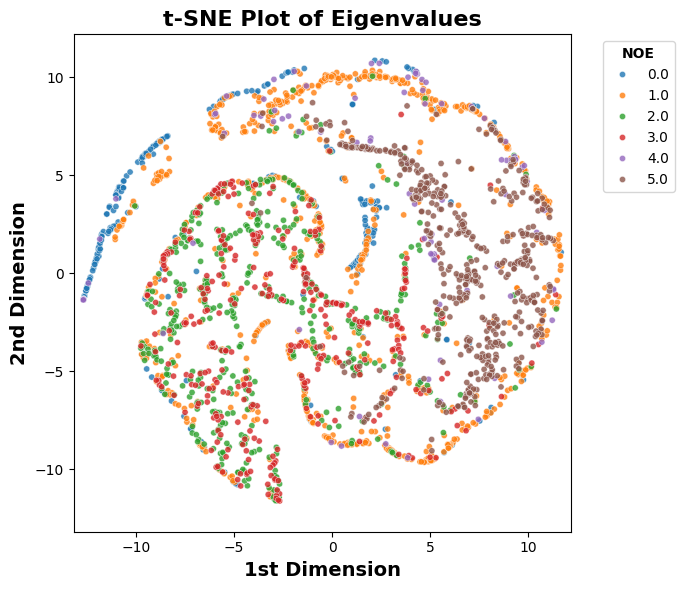

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import manifold

# Load the data
x = np.load('Eval.npy')    # shape: (2730, 100)
y = np.load('Class.npy')   # shape: (2730,)

# Normalize eigenvalues per sample (recommended for t-SNE)
x_norm = (x - x.mean(axis=1, keepdims=True)) / (x.std(axis=1, keepdims=True) + 1e-8)

# Run t-SNE
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, n_iter=300, perplexity=30)
x_tsne = tsne.fit_transform(x_norm)

# Create DataFrame for plotting
tsne_df = pd.DataFrame({
    'Dim1': x_tsne[:, 0],
    'Dim2': x_tsne[:, 1],
    'label': y
})

# Define custom color palette for 6 classes
palette = sns.color_palette("tab10", n_colors=6)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x='Dim1', y='Dim2', hue='label',
    palette=palette, data=tsne_df, ax=ax, s=20, alpha=0.8
)

# Formatting
lim = (x_tsne.min() - 0.5, x_tsne.max() + 0.5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('t-SNE Plot of Eigenvalues', fontsize=16, fontweight='bold')
ax.set_xlabel('1st Dimension', fontsize=14, fontweight='bold')
ax.set_ylabel('2nd Dimension', fontsize=14, fontweight='bold')
ax.legend(title='NOE', title_fontproperties={'weight': 'bold'}, bbox_to_anchor=(1.05, 1), loc='upper left')



# Save high-resolution image
fig.tight_layout()
fig.savefig('tsne_Eval.png', format='png', dpi=1200)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


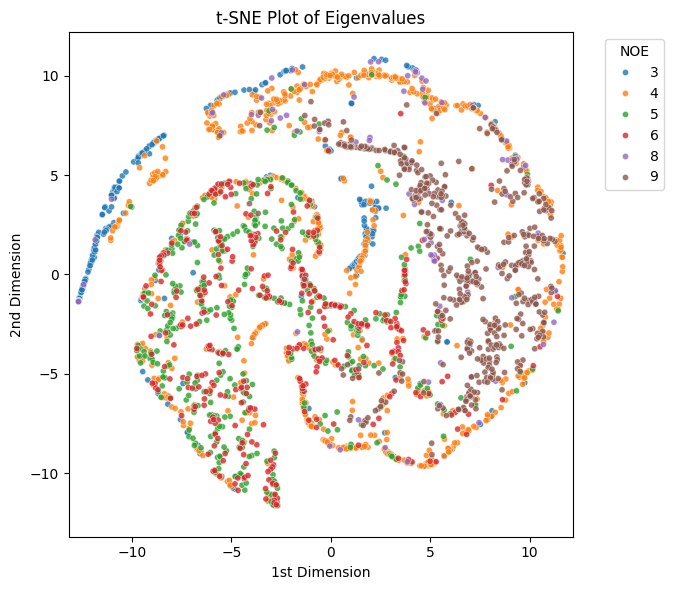

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import manifold

# Load the data
x = np.load('Eval.npy')    # shape: (2730, 100)
y = np.load('Class.npy')   # shape: (2730,)

# Normalize eigenvalues per sample
x_norm = (x - x.mean(axis=1, keepdims=True)) / (x.std(axis=1, keepdims=True) + 1e-8)

# Run t-SNE
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, n_iter=300, perplexity=30)
x_tsne = tsne.fit_transform(x_norm)

# Remap labels from 0–5 to desired values
label_map = {0: 3, 1: 4, 2: 5, 3: 6, 4: 8, 5: 9}
y_mapped = np.vectorize(label_map.get)(y)

# Create DataFrame for plotting
tsne_df = pd.DataFrame({
    'Dim1': x_tsne[:, 0],
    'Dim2': x_tsne[:, 1],
    'NOE': y_mapped
})

# Define custom color palette for 6 classes
palette = sns.color_palette("tab10", n_colors=6)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x='Dim1', y='Dim2', hue='NOE',
    palette=palette, data=tsne_df, ax=ax, s=20, alpha=0.8
)

# Formatting
lim = (x_tsne.min() - 0.5, x_tsne.max() + 0.5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('t-SNE Plot of Eigenvalues')
ax.set_xlabel('1st Dimension')
ax.set_ylabel('2nd Dimension')
ax.legend(title='NOE', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save high-resolution image
fig.tight_layout()
fig.savefig('tsne_Eval_updated.png', format='png', dpi=1200)
plt.show()


#DECISION TREE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create a decision tree model
dtc = DecisionTreeClassifier()

# Train the model on the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict the class labels for the testing data
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = dtc.predict(X_test)

# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)

target_names = ['nem=3', 'nem=4', 'nem=5','nem=6', 'nem=8', 'nem=9']
#target_names = ['nem=3','nem=4']
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

       nem=3     0.8772    0.9091    0.8929       110
       nem=4     0.8925    0.8737    0.8830       285
       nem=5     0.5764    0.6724    0.6207       174
       nem=6     0.5429    0.4318    0.4810       132
       nem=8     0.8529    0.9355    0.8923        31
       nem=9     0.9880    0.9704    0.9791       169

    accuracy                         0.7947       901
   macro avg     0.7883    0.7988    0.7915       901
weighted avg     0.7949    0.7947    0.7930       901



In [ ]:
import pickle

# Assume 'decision_tree_model' is your trained Decision Tree model
with open('dtc.pkl', 'wb') as model_file:
    pickle.dump(dtc, model_file)

print("Model saved successfully!")



Model saved successfully!


In [ ]:
# Load the model
with open('dtc.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import numpy as np
from scipy.io import loadmat, savemat
from sklearn.decomposition import PCA # Import PCA from sklearn.decomposition

# Load the Urban /content/new.matimage data
data = loadmat('/content/new.mat')  # Update with your file path
Z = data['data']  # Replace 'Y' with the correct key if different

# Reshape Z to 2D if it's 3D
if Z.ndim == 3:
    Z = Z.reshape(Z.shape[0], -1)  # Reshape to (num_samples, num_features)

pca = PCA() # Now PCA is defined and can be used
pca.fit(Z)

FileNotFoundError: [Errno 2] No such file or directory: '/content/new.mat'

In [ ]:
##For dc mall data testing using pre trained decision tree###
import numpy as np
from scipy.io import loadmat, savemat
from sklearn.decomposition import PCA # Import PCA from sklearn.decomposition

# Load the Urban /content/new.matimage data
data = loadmat('/content/dc_endmembers.mat')  # Update with your file path
Z = data['X']  # Replace 'Y' with the correct key if different

ZData=np.transpose(Z)
ZData.shape

pca = PCA() # Now PCA is defined and can be used
pca.fit(ZData)

In [ ]:
eigenvalues = pca.explained_variance_[:100]
eigenvalues.shape

In [ ]:
eigenvalues_normalized = eigenvalues / np.max(eigenvalues)
eigenvalues_normalized.shape

In [ ]:
with open('dtc.pkl', 'rb') as model_file:
    decision_tree_model = pickle.load(model_file)

In [ ]:
eigenvalues_input = eigenvalues_normalized.reshape(1, -1)
eigenvalues_input.shape

In [ ]:
predicted_endmembers = decision_tree_model.predict(eigenvalues_input)

In [ ]:
print(f"Predicted number of endmembers: {predicted_endmembers[0]}")
#print("The value of em is:", predicted_endmembers)

In [ ]:
plt.plot(range(1, 101), eigenvalues, marker='o')
plt.title('First 100 Eigenvalues of Urban HSI')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

***********FOr decision tree UNABLE TO MEASURE PRECISION & F1 Score. its saying Classification metrics can't handle a mix of multiclass and continuous targets************* ** ***bold text***

# SOFM

In [ ]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [ ]:
# Helper functions

# Data Normalisation
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance:
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [ ]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(7.5*10e3)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [ ]:
#mian function

train_x_norm = minmax_scaler(X_train) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

In [ ]:
# collecting labels

label_data = y_train
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

In [ ]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [ ]:
# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(X_test) # normalisation

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(y_test, np.array(winner_labels)))

# IMPLEMENTING BNN

In [ ]:
pip install torchbnn

In [ ]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt
#%matplotlib inline
#1. Load Iris Data
#iris = datasets.load_iris()
#X = iris.data
#Y = iris.target
x, y = torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long()
x.shape, y.shape

In [ ]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=4),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=100),
)
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)
kl_weight = 0.1
for step in range(3000):
    pre = model(x)
    ce = ce_loss(pre, y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

#LOGISTIC REGRESSION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import sklearn
lr=sklearn.linear_model.LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
#print(f"LR F1 Score {100*f1_score(y_test, y_pred_lr, average='macro')}")
#print(f"Accuracy {100*accuracy_score(y_test, y_pred_lr)}")
#print(f"Kappa Value {100*sklearn.metrics.cohen_kappa_score(y_test, y_pred_lr)}")
# Predict the class labels for the testing data
from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score
#y_pred = dtc.predict(X_test)

# Calculate the accuracy
#accuracy = np.mean(y_pred == y_test)

target_names = ['nem=3', 'nem=4', 'nem=5','nem=6', 'nem=8', 'nem=9']
#target_names = ['nem=3','nem=4']
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

       nem=3     0.8772    0.9091    0.8929       110
       nem=4     0.8925    0.8737    0.8830       285
       nem=5     0.5764    0.6724    0.6207       174
       nem=6     0.5429    0.4318    0.4810       132
       nem=8     0.8529    0.9355    0.8923        31
       nem=9     0.9880    0.9704    0.9791       169

    accuracy                         0.7947       901
   macro avg     0.7883    0.7988    0.7915       901
weighted avg     0.7949    0.7947    0.7930       901



In [ ]:
X_test.shape

(901, 100)

In [ ]:
import pickle

# Assume 'decision_tree_model' is your trained Decision Tree model
with open('lr.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)

In [ ]:
import numpy as np
from scipy.io import loadmat, savemat
from sklearn.decomposition import PCA # Import PCA from sklearn.decomposition

# Load the Urban image data
data = loadmat('/content/new.mat')  # Update with your file path
Z = data['data']  # Replace 'Y' with the correct key if different

# Reshape Z to 2D if it's 3D
if Z.ndim == 3:
    Z = Z.reshape(Z.shape[0], -1)  # Reshape to (num_samples, num_features)

pca = PCA() # Now PCA is defined and can be used
pca.fit(Z)

FileNotFoundError: [Errno 2] No such file or directory: '/content/new.mat'

In [ ]:
eigenvalues = pca.explained_variance_[:100]
eigenvalues.shape

In [ ]:
# Load the pretrained logistic regression model
import joblib
model = joblib.load('lr.pkl')  # Replace with your model path


In [ ]:
# Reshape eigenvalues to match the model's input shape
eigenvalues_input = eigenvalues_normalized.reshape(1, -1)  # (1, 100)

# Predict the number of endmembers
predicted_endmembers = model.predict(eigenvalues_input)

print(f"Predicted number of endmembers: {predicted_endmembers[0]}")


In [ ]:
eigenvalues_input.shape

# RANDOM FOREST CLASSIFIER

In [ ]:
# %% Fit blackbox model (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import sklearn
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
target_names = ['nem=3', 'nem=4', 'nem=5','nem=6', 'nem=8', 'nem=9']
#target_names = ['nem=3','nem=4']
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
#print(f"F1 Score {100*f1_score(y_test, y_pred, average='macro')}")
#print(f"Accuracy {100*accuracy_score(y_test, y_pred)}")
#print(f"Kappa Value {100*sklearn.metrics.cohen_kappa_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       nem=3     0.9392    0.9653    0.9521       288
       nem=4     0.9477    0.8947    0.9205       304
       nem=5     0.7582    0.7419    0.7500       279
       nem=6     0.7720    0.8116    0.7913       292
       nem=8     0.9710    0.9805    0.9757       307
       nem=9     0.9781    0.9675    0.9728       277

    accuracy                         0.8947      1747
   macro avg     0.8944    0.8936    0.8937      1747
weighted avg     0.8956    0.8947    0.8949      1747



#SMOTE+RANDOM FOREST

In [ ]:
from imblearn.over_sampling import SMOTE
from torch.nn.functional import normalize
from torchvision import transforms
from sklearn import preprocessing
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import torch
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(x, y)
X_smote=preprocessing.normalize(X_smote,norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.33, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

target_names = ['nem=3', 'nem=4', 'nem=5','nem=6', 'nem=8', 'nem=9']
#target_names = ['nem=3','nem=4']
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

#print(f"F1 Score {100*f1_score(y_test, y_pred, average='macro')}")
#print(f"Accuracy {100*accuracy_score(y_test, y_pred)}")
#print(f"Kappa Value {100*sklearn.metrics.cohen_kappa_score(y_test, y_pred)}")

              precision    recall  f1-score   support

       nem=3     0.9394    0.9688    0.9538       288
       nem=4     0.9477    0.8947    0.9205       304
       nem=5     0.7572    0.7491    0.7532       279
       nem=6     0.7789    0.8082    0.7933       292
       nem=8     0.9741    0.9805    0.9773       307
       nem=9     0.9782    0.9711    0.9746       277

    accuracy                         0.8964      1747
   macro avg     0.8959    0.8954    0.8954      1747
weighted avg     0.8972    0.8964    0.8966      1747



# XGBCLASSIFIER

In [ ]:
import collections
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pylab as pl
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

target_names = ['nem=3', 'nem=4', 'nem=5','nem=6', 'nem=8', 'nem=9']
#target_names = ['nem=3','nem=4']
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

#print(f"F1 Score {100*f1_score(y_test, y_pred, average='macro')}")
#print(f"Accuracy {100*accuracy_score(y_test, y_pred)}")
#print(f"Kappa Value {100*sklearn.metrics.cohen_kappa_score(y_test, y_pred)}")

## ***ADABOOST CLASSIFIER***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize AdaBoost classifier with default base estimator (DecisionTreeClassifier)
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
# Training accuracy
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")


In [ ]:
target_names = ['nem=3', 'nem=4', 'nem=5','nem=6', 'nem=8', 'nem=9']
#target_names = ['nem=3','nem=4']
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

#print(f"F1 Score {100*f1_score(y_test, y_pred, average='macro')}")
#print(f"Accuracy {100*accuracy_score(y_test, y_pred)}")
#print(f"Kappa Value {100*sklearn.metrics.cohen_kappa_score(y_test, y_pred)}")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import label_binarize
import numpy as np # Import numpy

# Train AdaBoost
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the predicted probabilities for all classes
# predict_proba returns the probabilities for each class
y_proba = model.predict_proba(X_test)

# Binarize the target variable for One-vs-Rest approach
# Get the unique classes from the training data to ensure all possible classes are covered
classes = np.unique(y_train)
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute ROC curve and AUC for each class using the One-vs-Rest approach
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1] # Number of classes after binarization

for i in range(n_classes):
    # Calculate ROC curve for class i against all other classes
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    # Calculate AUC for class i
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
# Use a colormap for different classes for better visualization
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - AdaBoost (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# *CATBOOST* *CLASSIFIER*


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize CatBoost model
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Fit model to training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
# Predict on training data
train_pred = model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
target_names = ['nem=3', 'nem=4', 'nem=5','nem=6', 'nem=8', 'nem=9']
#target_names = ['nem=3','nem=4']
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

#print(f"F1 Score {100*f1_score(y_test, y_pred, average='macro')}")
#print(f"Accuracy {100*accuracy_score(y_test, y_pred)}")
#print(f"Kappa Value {100*sklearn.metrics.cohen_kappa_score(y_test, y_pred)}")

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np # Import numpy

# Train Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the predicted probabilities for all classes
# predict_proba returns the probabilities for each class
y_proba = model.predict_proba(X_test)

# Binarize the target variable for One-vs-Rest approach
# Get the unique classes from the training data to ensure all possible classes are covered
classes = np.unique(y_train)
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute ROC curve and AUC for each class using the One-vs-Rest approach
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1] # Number of classes after binarization

for i in range(n_classes):
    # Calculate ROC curve for class i against all other classes
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    # Calculate AUC for class i
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
# Use a colormap for different classes for better visualization
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **GRADIENT BOOSTING ALGORITHM**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the training set (optional)
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")


In [ ]:
target_names = ['nem=3', 'nem=4', 'nem=5','nem=6', 'nem=8', 'nem=9']
#target_names = ['nem=3','nem=4']
print(classification_report(y_test, y_test_pred, target_names=target_names, digits=4))

#print(f"F1 Score {100*f1_score(y_test, y_pred, average='macro')}")
#print(f"Accuracy {100*accuracy_score(y_test, y_pred)}")
#print(f"Kappa Value {100*sklearn.metrics.cohen_kappa_score(y_test, y_pred)}")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np # Import numpy

# Train Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the predicted probabilities for all classes
# predict_proba returns the probabilities for each class
y_proba = model.predict_proba(X_test)

# Binarize the target variable for One-vs-Rest approach
# Get the unique classes from the training data to ensure all possible classes are covered
classes = np.unique(y_train)
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute ROC curve and AUC for each class using the One-vs-Rest approach
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1] # Number of classes after binarization

for i in range(n_classes):
    # Calculate ROC curve for class i against all other classes
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    # Calculate AUC for class i
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
# Use a colormap for different classes for better visualization
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# **SVM CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
# Predict on training data
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

target_names = ['nem=3', 'nem=4', 'nem=5','nem=6', 'nem=8', 'nem=9']
#target_names = ['nem=3','nem=4']
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

#print(f"F1 Score {100*f1_score(y_test, y_pred, average='macro')}")
#print(f"Accuracy {100*accuracy_score(y_test, y_pred)}")
#print(f"Kappa Value {100*sklearn.metrics.cohen_kappa_score(y_test, y_pred)}")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Train the SVM with probability output enabled
model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
model.fit(X_train, y_train)

# Get the predicted probabilities for all classes
y_proba = model.predict_proba(X_test)

# Binarize the target variable for One-vs-Rest approach
# Get the unique classes from the training data to ensure all possible classes are covered
classes = np.unique(y_train)
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes) # Use a colormap for different classes

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# t-SNE PLOT

In [ ]:
# tSNE Plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
import seaborn as sns
perplexity = [5, 30, 50, 100]
tsne = manifold.TSNE(n_components=2,init="random",random_state=0,n_iter=300,)
x1=tsne.fit_transform(X_smote)



In [ ]:
import pandas as pd
# Convert do DataFrame and plot
tsne_result_df = pd.DataFrame({'Dim1': x1[:,0],
                               'Dim2': x1[:,1],
                               'label': y_smote})
fig, ax = plt.subplots(1)
sns.scatterplot(x='Dim1', y='Dim2', hue='label', data=tsne_result_df, ax=ax,s=20)
lim = (x1.min()-.5, x1.max()+.5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
fig.savefig('tsne_Eval.png', format='png', dpi=1200)

In [ ]:
tsne_result_df

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE

# Load and normalize
x = np.load('Eval.npy')
y = np.load('Class.npy')
x_norm = (x - x.mean(axis=1, keepdims=True)) / (x.std(axis=1, keepdims=True) + 1e-8)

# Perplexity values to test
perplexities = [5]
palette = sns.color_palette("tab10", n_colors=6)

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, perp in enumerate(perplexities):
    tsne = TSNE(n_components=2, init='random', random_state=0, n_iter=500, perplexity=perp)
    x_tsne = tsne.fit_transform(x_norm)

    df = pd.DataFrame({
        'Dim1': x_tsne[:, 0],
        'Dim2': x_tsne[:, 1],
        'label': y
    })

    sns.scatterplot(
        x='Dim1', y='Dim2', hue='label', palette=palette, data=df,
        s=20, alpha=0.8, ax=axes[i], legend=False
    )
    axes[i].set_title(f't-SNE (Perplexity = {perp})')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')
    axes[i].set_aspect('equal')

# Add a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='No. of Endmembers', loc='center right')
fig.suptitle('t-SNE Plots with Varying Perplexity', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.savefig('tsne_perplexity_comparison.png', dpi=1200)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Load eigenvalues and class labels
x = np.load('Eval.npy')    # Shape: (N, 100)
y = np.load('Class.npy')   # Shape: (N,)

# Normalize eigenvalue vectors (optional but recommended)
x_norm = (x - x.mean(axis=1, keepdims=True)) / (x.std(axis=1, keepdims=True) + 1e-8)

# Apply t-SNE with fixed perplexity (e.g., 30)
tsne = TSNE(n_components=2, init="random", random_state=0, n_iter=300, perplexity=30)
x_tsne = tsne.fit_transform(x_norm)

# Create DataFrame for plotting
df_tsne = pd.DataFrame({
    'Dim1': x_tsne[:, 0],
    'Dim2': x_tsne[:, 1],
    'label': y.astype(int)
})

# Plot with 6 distinct colors for 6 classes
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_tsne, x='Dim1', y='Dim2',
    hue='label', palette='Set1', s=25, alpha=0.8
)
plt.title('Combined t-SNE Plot of Eigenvalue Distributions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Number of Endmembers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('tsne_Eval_combined.png', dpi=1200)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


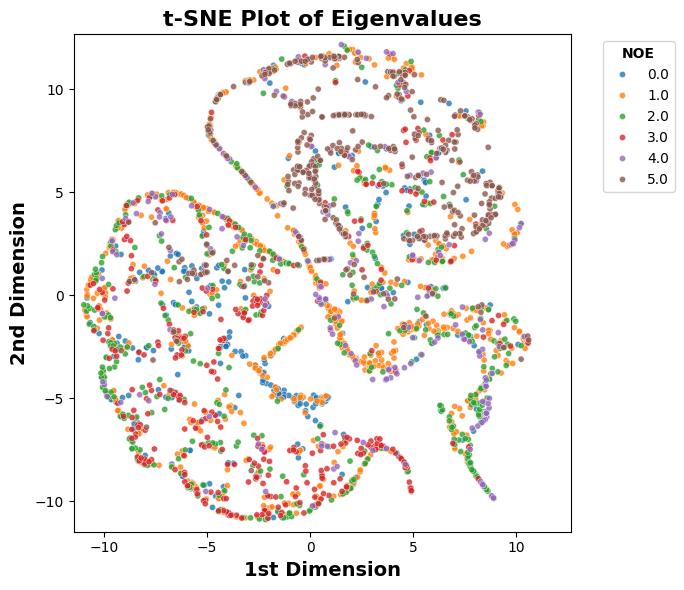

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import manifold

# Load the data
x = np.load('/content/drive/MyDrive/Eval.npy')    # shape: (2730, 100)
y = np.load('/content/drive/MyDrive/Class.npy')   # shape: (2730,)

# Normalize eigenvalues per sample (recommended for t-SNE)
x_norm = (x - x.mean(axis=1, keepdims=True)) / (x.std(axis=1, keepdims=True) + 1e-8)

# Run t-SNE
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, n_iter=300, perplexity=30)
x_tsne = tsne.fit_transform(x_norm)

# Create DataFrame for plotting
tsne_df = pd.DataFrame({
    'Dim1': x_tsne[:, 0],
    'Dim2': x_tsne[:, 1],
    'label': y
})

# Define custom color palette for 6 classes
palette = sns.color_palette("tab10", n_colors=6)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x='Dim1', y='Dim2', hue='label',
    palette=palette, data=tsne_df, ax=ax, s=20, alpha=0.8
)

# Formatting
lim = (x_tsne.min() - 0.5, x_tsne.max() + 0.5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.set_title('t-SNE Plot of Eigenvalues', fontsize=16, fontweight='bold')
ax.set_xlabel('1st Dimension', fontsize=14, fontweight='bold')
ax.set_ylabel('2nd Dimension', fontsize=14, fontweight='bold')
ax.legend(title='NOE', title_fontproperties={'weight': 'bold'}, bbox_to_anchor=(1.05, 1), loc='upper left')



# Save high-resolution image
fig.tight_layout()
fig.savefig('tsne_Eval.png', format='png', dpi=1200)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


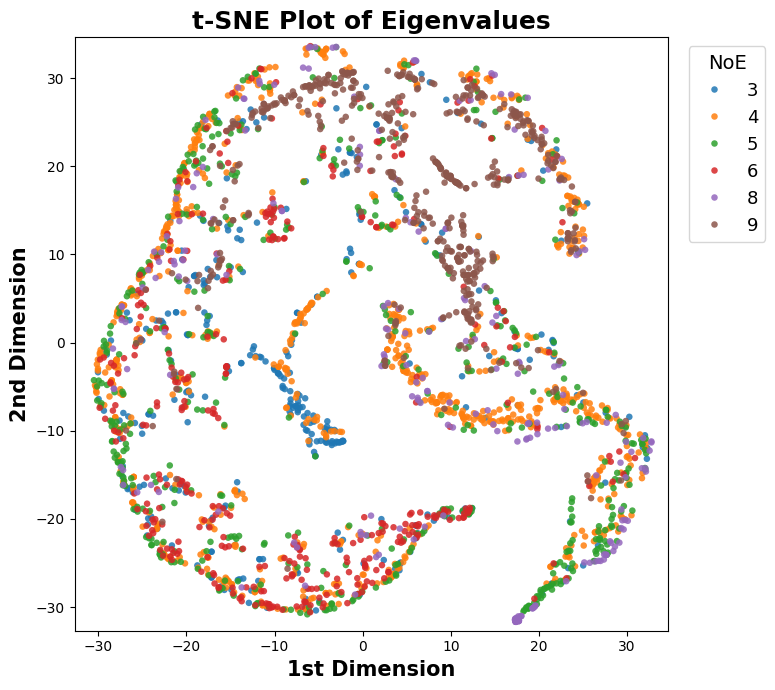

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import manifold

# Load the data
x = np.load('/content/drive/MyDrive/Eval.npy')    # shape: (2730, 100)
y = np.load('/content/drive/MyDrive/Class.npy')   # shape: (2730,)

# ---------------------------------------------------------------------
# 1️⃣  Correct Label Mapping (Class → Actual NoE)
# ---------------------------------------------------------------------
mapping = {0:3, 1:4, 2:5, 3:6, 4:8, 5:9}
y_mapped = np.vectorize(mapping.get)(y.astype(int))

# ---------------------------------------------------------------------
# 2️⃣ Normalize eigenvalues per sample (recommended for t-SNE)
# ---------------------------------------------------------------------
x_norm = (x - x.mean(axis=1, keepdims=True)) / (x.std(axis=1, keepdims=True) + 1e-8)

# ---------------------------------------------------------------------
# 3️⃣ Run t-SNE
# ---------------------------------------------------------------------
tsne = manifold.TSNE(
    n_components=2,
    init='random',
    random_state=0,
    n_iter=500,
    perplexity=35,
    learning_rate='auto'
)
x_tsne = tsne.fit_transform(x_norm)

# ---------------------------------------------------------------------
# 4️⃣ Prepare DataFrame for plotting
# ---------------------------------------------------------------------
tsne_df = pd.DataFrame({
    'Dim1': x_tsne[:, 0],
    'Dim2': x_tsne[:, 1],
    'NOE': y_mapped
})

# Define custom colors for the 6 NoE classes
palette = sns.color_palette("tab10", n_colors=6)

# ---------------------------------------------------------------------
# 5️⃣ t-SNE Scatter Plot
# ---------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 7))

sns.scatterplot(
    x='Dim1',
    y='Dim2',
    hue='NOE',
    palette=palette,
    data=tsne_df,
    ax=ax,
    s=22,
    alpha=0.85,
    edgecolor='none'
)

# Formatting
ax.set_title('t-SNE Plot of Eigenvalues', fontsize=18, fontweight='bold')
ax.set_xlabel('1st Dimension', fontsize=15, fontweight='bold')
ax.set_ylabel('2nd Dimension', fontsize=15, fontweight='bold')

# Fix axes equal scale
lim = (x_tsne.min() - 1, x_tsne.max() + 1)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

# Legend formatting
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    labels,
    title='NoE',
    title_fontsize=14,
    fontsize=13,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

# Save high-resolution image
fig.tight_layout()
fig.savefig('tsne_Eval.png', format='png', dpi=1200)

plt.show()
